## Chargements des données

In [18]:
import pandas
import numpy as np

In [19]:
def open_otto_csv(file):
    return pandas.read_csv(file, sep=',')

In [20]:
files = {"train": "./res/train.csv", "test": "./res/test.csv"}
files["train"] = open_otto_csv(files["train"])
files["test"] = open_otto_csv(files["test"])

In [21]:
def get_x_y(pandas_data_frame):
    y = pandas_data_frame["target"]
    x = pandas_data_frame.drop(columns=["id", "target"])
    return x, y

In [22]:
train_x, train_y = get_x_y(files["train"])

## Quelques observations sur les données

In [23]:
train_x.info(max_cols=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Columns: 93 entries, feat_1 to feat_93
dtypes: int64(93)
memory usage: 43.9 MB


In [24]:
nbre_example = len(train_x)
class_list = set(train_y)
nbre_class = len(class_list)
print("le nombre d'exemples dans le dataset est de :", nbre_example)
print("le nombre de classes différentes est de :", nbre_class)
print(class_list)

le nombre d'exemples dans le dataset est de : 61878
le nombre de classes différentes est de : 9
{'Class_4', 'Class_2', 'Class_7', 'Class_6', 'Class_9', 'Class_8', 'Class_1', 'Class_5', 'Class_3'}


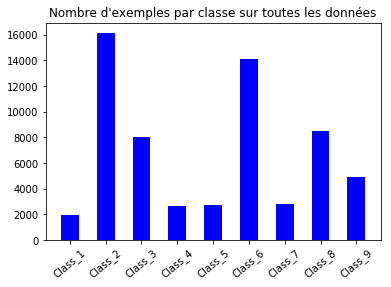

In [25]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pylab

def mk_dict_labels(all_y):
    values = []
    count_labels = {}
    for row in all_y.values:
        values.append(row)
    for l in values:
        if l in count_labels:
            count_labels[l] += 1
        else:
            count_labels[l] = 1
    return count_labels

def plot_hist(labels, data):
    labels = [(k,v) for k, v in labels.items()]
    labels.sort(key=lambda k: k[0])
    x = [i for i in range(len(labels))]
    x_name = [k for k,_ in labels]
    y = [v for _,v in labels]
    if data == "all_data":
        plt.title("Nombre d'exemples par classe sur toutes les données")
        colorBar = "blue"
    if data == "train_data":
        plt.title("Nombre d'exemples par classe sur les données d'entrainement")
        colorBar = "green"
    if data == "valid_data":
        plt.title("Nombre d'exemples par classe sur les données de validation")
        colorBar = "purple"
    plt.bar(x, y, 0.5, color=colorBar)
    pylab.xticks(x, x_name, rotation=40)
    plt.show()
    
count_labels = mk_dict_labels(train_y)
plot_hist(count_labels, "all_data")    

## Division des données en apprentissage/validation

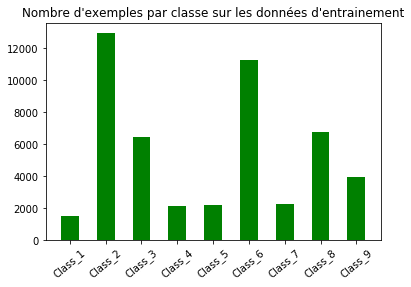

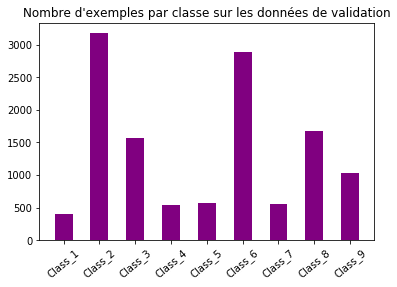

12376


In [26]:
from sklearn.model_selection import train_test_split

# Split des données en partition de train et partition de validation
# 80% -> train
# 20% -> validation
data_train, data_valid, labels_train, labels_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Nombre d'exemples par classe pour les données d'entrainement
count_labels_t = mk_dict_labels(labels_train)
plot_hist(count_labels_t, "train_data")

# Nombre d'exemples par classe pour les données de validation
count_labels_v = mk_dict_labels(labels_valid)
plot_hist(count_labels_v, "valid_data")

print(len(data_valid))

<strong>Remarque</strong> : On observe que la distribution au niveau du nombre d'exemples en fonction des classes est préservée même après le split.

In [29]:
from sklearn.metrics import f1_score, log_loss

def evaluate_model(true_y, y_pred, y_pred_proba):
    score = f1_score(true_y, y_pred, average = 'weighted')
    logLoss = log_loss(true_y, y_pred_proba, eps = 1e-15)
    tmp_y=np.asarray(true_y)
    print("f1_score precision : (version sklearn)", score)
    print("La log-loss est de : ", logLoss)
    print("evaluation (version Sam) : ")
    print(tmp_y[tmp_y==y_pred].shape[0], "/", y_pred.shape[0])
    print("Precision : %f" % (tmp_y[tmp_y==y_pred].shape[0] / y_pred.shape[0]))
    
def evaluate_model_Acc(true_y, y_pred):
    score = f1_score(true_y, y_pred, average = 'weighted')
    tmp_y=np.asarray(true_y)
    print("f1_score precision : (version sklearn)", score)
    print("evaluation (version Sam) : ")
    print(tmp_y[tmp_y==y_pred].shape[0], "/", y_pred.shape[0])
    print("Precision : %f" % (tmp_y[tmp_y==y_pred].shape[0] / y_pred.shape[0]))

def evaluate_model_prob(true_y, y_pred_proba):
    logLoss = log_loss(true_y, y_pred_proba, eps = 1e-15)
    print("La log-loss est de : ", logLoss)

## Création du fichier csv pour la soumission Kaggle

In [30]:
testx = files["test"].drop(columns=["id"])

def make_csv_soumission(model, test_x, fileName, nb_class):
    y = model.predict_proba(test_x)
    dt = pandas.DataFrame(data=y, \
                          index=np.arange(1, y.shape[0]+1), \
                          columns=["Class_1","Class_2","Class_3","Class_4", \
                                   "Class_5","Class_6","Class_7","Class_8","Class_9"])
    dt.to_csv(fileName, sep=",", index_label="id")
    
def make_csv_soumission2(y, fileName, nb_class):
    dt = pandas.DataFrame(data=y, \
                          index=np.arange(1, y.shape[0]+1), \
                          columns=["Class_1","Class_2","Class_3","Class_4", \
                                   "Class_5","Class_6","Class_7","Class_8","Class_9"])
    dt.to_csv(fileName, sep=",", index_label="id")

## Comparatif sur quelques classifiers différents

### Classifier : SVM

In [12]:
import sklearn.svm as svm

In [33]:
svc = svm.SVC(max_iter = 1000, gamma='auto', probability=True)
svc.fit(train_x, train_y)

y_pred2 = svc.predict(data_valid)

evaluate_model_Acc(labels_valid, y_pred2)

/home/samuel/env/lib/python3.5/site-packages/sklearn/svm/base.py:244: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=1000, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
make_csv_soumission(svc, testx, "res_svm.csv", nbre_class) # 0.75649

### Classifier : K-NN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(data_train, labels_train)

y_pred3 = knn.predict(data_valid)
y_pred3_probas = knn.predict_proba(data_valid)

evaluate_model(labels_valid, y_pred3, y_pred3_probas)

f1_score precision : (version sklearn) 0.7739562191425366
La log-loss est de :  2.3086776076579794
evaluation (version Sam) : 
9662 / 12376
Precision : 0.780705


In [58]:
make_csv_soumission(knn, testx, "res_knn.csv", nbre_class)

### Classifier : Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(data_train, labels_train)

y_pred4 = nb.predict(data_valid)
y_pred4_probas = nb.predict_proba(data_valid)

evaluate_model(labels_valid, y_pred4, y_pred4_probas)

f1_score precision : (version sklearn) 0.6286302230265768
La log-loss est de :  7.251880092416661
evaluation (version Sam) : 
7684 / 12376
Precision : 0.620879


In [60]:
make_csv_soumission(knn, testx, "res_GaussNaiveBayes.csv", nbre_class)

### Classifier : Perceptron

In [35]:
from sklearn.linear_model import Perceptron

perceptron_clf = Perceptron(max_iter = 1000)
perceptron_clf.fit(data_train, labels_train)

y_pred5 = perceptron_clf.predict(data_valid)

evaluate_model_Acc(labels_valid, y_pred5)

f1_score precision : (version sklearn) 0.690788007968747
evaluation (version Sam) : 
8718 / 12376
Precision : 0.704428


### Classifier : Regression Logistique

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(max_iter = 1000)
logistic_clf.fit(data_train, labels_train)

y_pred6 = logistic_clf.predict(data_valid)
y_pred6_probas = logistic_clf.predict_proba(data_valid)

evaluate_model(labels_valid, y_pred6, y_pred6_probas)

f1_score precision : (version sklearn) 0.7343083104433648
La log-loss est de :  0.6699890545002816
evaluation (version Sam) : 
9367 / 12376
Precision : 0.756868


### Classifier : SGDClassifier = modèle linéaire + descente de gradient stochastique

In [16]:
from sklearn.linear_model import SGDClassifier

SGD_clf = SGDClassifier(max_iter=1000)
SGD_clf.fit(data_train, labels_train)

y_predSGD = SGD_clf.predict(data_valid)

evaluate_model_Acc(labels_valid, y_predSGD)

f1_score precision : (version sklearn) 0.7216904073127184
evaluation (version Sam) : 
9295 / 12376
Precision : 0.751050


### Classifier : MLP Classifier : Multi-Layers-Perceptron

In [34]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (30, 15), learning_rate = 'adaptive')
mlp_clf.fit(data_train, labels_train)

y_pred8 = mlp_clf.predict(data_valid)
y_pred8_probas = mlp_clf.predict_proba(data_valid)

evaluate_model(labels_valid, y_pred8, y_pred8_probas)

f1_score precision : (version sklearn) 0.7776234266031896
La log-loss est de :  0.5616724859868261
evaluation (version Sam) : 
9718 / 12376
Precision : 0.785229


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Classifier : Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d

rnd_f = RandomForestClassifier(n_estimators = 250)
rnd_f.fit(data_train, labels_train)

y_pred9 = rnd_f.predict(data_valid)
y_pred9_probas = rnd_f.predict_proba(data_valid)

evaluate_model(labels_valid, y_pred9, y_pred9_probas)

f1_score precision : (version sklearn) 0.8015505959705683
La log-loss est de :  0.5783165926416591
evaluation (version Sam) : 
10039 / 12376
Precision : 0.811167


In [35]:
make_csv_soumission(rnd_f, testx, "res_rndF.csv", nbre_class) # 0.56

### Classifier : XGBoost

In [38]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(gamma = 0.03, learning_rate = 0.08, max_depth = 7, n_estimators = 250)
print("train du xgb...")
xgb.fit(train_x, train_y)

print("predict du xgb...")
# y_pred10 = xgb.predict(data_valid)
y_pred10_probas = xgb.predict_proba(testx)

# evaluate_model(labels_valid, y_pred10, y_pred10_probas)

train du xgb...
predict du xgb...


In [40]:
make_csv_soumission2(y_pred10_probas, 'xgb.csv', nbre_class) # 0.48

## Optimisation d'hyper-paramètres sur certains classifier

In [15]:
# On fait un split servant uniquement à réduire le nombre d'exemples du train car l'étape de recherche des meilleurs
# hyper-paramètres est très couteuse.
test_tx, test_vx, test_ty, test_vy = train_test_split(train_x, train_y, test_size=0.8, random_state=42)

print(len(test_tx))

12375


### Recherche des meilleurs paramètres pour KNN

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [42]:
paramsKNN = {'n_neighbors' : [4,5,6],
             'weights'     : ['uniform', 'distance'],
             'algorithm'   : ['ball_tree', 'kd_tree', 'brute', 'auto'],
             'leaf_size'   : [20, 30],
             'p'           : [1,2]}

knn = GridSearchCV(KNeighborsClassifier(), param_grid = paramsKNN)
knn.fit(test_tx, test_ty)

print(knn.best_params_)

6187
{'algorithm': 'ball_tree', 'leaf_size': 20, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [29]:
from sklearn.neighbors import KNeighborsClassifier

knnOptim = KNeighborsClassifier(n_neighbors = 6, weights = 'distance', algorithm = 'brute', leaf_size = 20, p = 2)
knnOptim.fit(data_train, labels_train)

y_predOptimKNN = knnOptim.predict(data_valid)
y_predOptimKNN_probas = knnOptim.predict_proba(data_valid)

evaluate_model(labels_valid, y_predOptimKNN, y_predOptimKNN_probas)

f1_score precision : (version sklearn) 0.7859400968452307
La log-loss est de :  2.013001174242348
evaluation (version Sam) : 
9786 / 12376
Precision : 0.790724


In [24]:
make_csv_soumission(knnOptim, testx, "res_knn_opti.csv", nbre_class)

### Recherche des meilleurs paramètres pour SVM SVC

In [60]:
from sklearn.model_selection import GridSearchCV

paramsSVC = {'C'      : [1,10,100,1000],
             'kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
             'gamma'  : [1e-3, 1e-4],
             'tol'    : [1e-3, 1e-4]}

svc = GridSearchCV(svm.SVC(max_iter = 1000), param_grid = paramsSVC)
svc.fit(test_tx, test_ty)

print(svc.best_params_)

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/biard/

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'tol': 0.001}


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [62]:
svc = svm.SVC(max_iter = 1000, C = 10, gamma = 0.001, kernel = 'rbf', tol = 0.001)
svc.fit(data_train, labels_train)

y_predOptimSVC = svc.predict(data_valid)
y_predOptimSVC_probas = svc.predict_proba(data_valid)

evaluate_model(labels_valid, y_predOptimSVC, y_predOptimSVC_probas)

## Peu efficace

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


f1_score precision : (version sklearn) 0.6107105352232192
evaluation (version Sam) : 
7567 / 12376
Precision : 0.611425


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

paramMLP = {'solver' : ['sgd', 'adam'],
            'hidden_layer_sizes' : [(30,), (30,15), (50,), (50,25)],
            'learning_rate' : ['adaptive', 'constant']}

mlpOptim = GridSearchCV(MLPClassifier(), param_grid = paramMLP)
mlpOptim.fit(test_tx, test_ty)

print(mlpOptim.best_params_)

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

{'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'sgd'}


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
mlp_Optim_clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (50,), learning_rate = 'constant')
mlp_clf.fit(data_train, labels_train)

y_predOptimMLP = mlp_clf.predict(data_valid)
y_predOptimMLP_proba = mlp_clf.predict_proba(data_valid)

evaluate_model(labels_valid, y_predOptimMLP, y_predOptimMLP_proba)

f1_score precision : (version sklearn) 0.7793973092566393
evaluation (version Sam) : 
9706 / 12376
Precision : 0.784260


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Mélange : MLPClassifier & RandomForest

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy.core.umath_tests import inner1d

mlp_clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (30, 15), learning_rate = 'adaptive')
mlp_clf.fit(train_x, train_y)

rnd_f = RandomForestClassifier(n_estimators = 250)
rnd_f.fit(train_x, train_y)

y_predRndOptim = rnd_f.predict_proba(testx)
y_predMlpOptim = mlp_clf.predict_proba(testx)

y = 0.5*y_predRndOptim + 0.5*y_predMlpOptim

print(y.shape)

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(144368, 9)


In [40]:
make_csv_soumission2(y, 'mlpRnd.csv', nbre_class) # Kaggle : 0.51

## Mélange : MLP & Random Forest + Calibrage

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from numpy.core.umath_tests import inner1d

mlp_clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (30, 15), learning_rate = 'adaptive')
rnd_f = RandomForestClassifier(n_estimators = 250)

calibrated_mlp_clf = CalibratedClassifierCV(mlp_clf, method='isotonic', cv = 2)
calibrated_rnd_f = CalibratedClassifierCV(rnd_f, method = 'isotonic', cv = 2)

calibrated_mlp_clf.fit(train_x, train_y)
calibrated_rnd_f.fit(train_x, train_y)

y_predMlpCalibrated = calibrated_mlp_clf.predict_proba(testx)
y_predRndFCalibrated = calibrated_rnd_f.predict_proba(testx)

y = 0.5*y_predMlpCalibrated + 0.5*y_predRndFCalibrated

# evaluate_model_prob(labels_valid, y)

/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
y2 = 0.2*y_predMlpCalibrated + 0.8*y_predRndFCalibrated
print(y2.shape)

(144368, 9)


In [26]:
make_csv_soumission2(y, 'mlpRndCalibrated.csv', nbre_class) # 0.49

In [ ]:
make_csv_soumission2(y2, 'mlpRndCalibrated.csv', nbre_class) # 0.48

## Mélange : Random Forest + MLP + XGBoost

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from numpy.core.umath_tests import inner1d

mlp_clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (30, 15), learning_rate = 'adaptive')
rnd_f = RandomForestClassifier(n_estimators = 250)
xgb = XGBClassifier(gamma = 0.03, learning_rate = 0.08, max_depth = 7, n_estimators = 250)

calibrated_mlp_clf = CalibratedClassifierCV(mlp_clf, method='isotonic', cv = 2)
calibrated_rnd_f = CalibratedClassifierCV(rnd_f, method = 'isotonic', cv = 2)
calibrated_xgb = CalibratedClassifierCV(xgb, method = 'isotonic', cv = 2)

print("train du MLP...")
calibrated_mlp_clf.fit(train_x, train_y)
print("train du Random Forest...")
calibrated_rnd_f.fit(train_x, train_y)
print("train du XGBoost...")
calibrated_xgb.fit(train_x, train_y)

print("prédiction MLP...")
y_predMlpCalibrated = calibrated_mlp_clf.predict_proba(testx)
print("prédiction Random Forest...")
y_predRndFCalibrated = calibrated_rnd_f.predict_proba(testx)
print("prédiction XGBoost...")
y_predXGBCalibrated = calibrated_xgb.predict_proba(testx)

y = 0.2*y_predMlpCalibrated + 0.4*y_predRndFCalibrated + 0.4*y_predXGBCalibrated

train du MLP...


/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/biard/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


train du Random Forest...
train du XGBoost...
prédiction MLP...
prédiction Random Forest...
prédiction XGBoost...


In [37]:
make_csv_soumission2(y, 'RndF+MLP+XGBoost.csv', nbre_class) # 0.47